# Support Vector Machine

In [1]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import seaborn as sns

C:\Users\fabio\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder

In [16]:
import os, sys

sys.path.append(r'..\functions')
import model_functions, EDA

from importlib import reload

reload(model_functions)
reload(EDA)

<module 'EDA' from '..\\functions\\EDA.py'>

In [6]:
dataset=pd.read_csv(r"../Datasets/Social_Network_Ads.csv")

X_columns =['Age', 'EstimatedSalary']
target = 'Purchased'

# Splitting training and testing
X_train, X_test, y_train, y_test= train_test_split(dataset[X_columns],
                                                   dataset[target],
                                                   test_size=0.25, 
                                                   random_state=0)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

# Feature Scaling
# scaler = {}
# for column in X_train.columns.to_list():
#     scaler[column] = StandardScaler()
#     X_train[column] =scaler[column].fit_transform(X_train[[column]])
#     X_test[column]=scaler[column].transform(X_test[[column]])


# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

X_train shape:(300, 2)
y_train shape:(300,)
X_test shape:(100, 2)
y_test shape:(100,)


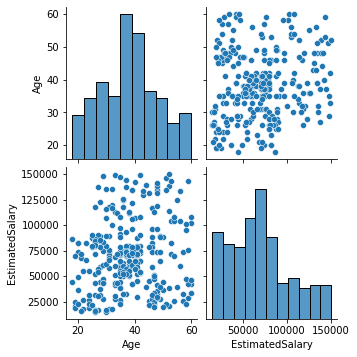

In [7]:
sns.pairplot(X_train);

In [8]:
from sklearn.svm import SVC

classifier= SVC(C=0.01, kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.813
Test set score:0.880


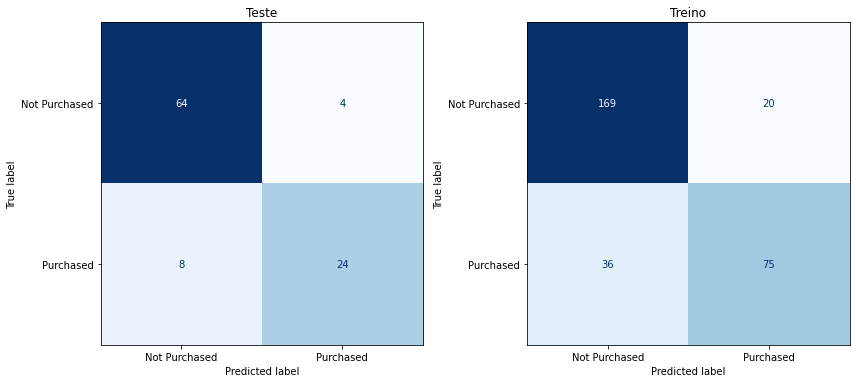

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(12,12))

plot_confusion_matrix(classifier, X_test, y_test, 
                      display_labels=['Not Purchased','Purchased'], 
                      cmap =plt.cm.Blues,ax = ax[0],colorbar=False);
ax[0].set_title('Teste');
plot_confusion_matrix(classifier, X_train, y_train, 
                      display_labels=['Not Purchased','Purchased'], 
                      cmap =plt.cm.Blues, ax= ax[1],colorbar=False);
ax[1].set_title('Treino');
plt.tight_layout()

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        68
           1       0.86      0.75      0.80        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



In [12]:
numerical = X_train.select_dtypes(include=np.number).columns.to_list()
categorical = X_test.select_dtypes(include='object').columns.to_list()

print('Total de colunas identificadas:',len(numerical + categorical))
print('Total de colunas em X:', len(X_train.columns))

# scaler=MinMaxScaler()
scaler=StandardScaler()

valores_scaling={}

for coluna in numerical:
    X_train[coluna] = scaler.fit_transform(X_train[[coluna]]).ravel()
    X_test[coluna] = scaler.transform(X_test[[coluna]]).ravel()
    valores_scaling[coluna] = scaler


Total de colunas identificadas: 2
Total de colunas em X: 2


In [13]:
classifier= SVC(C=1, kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



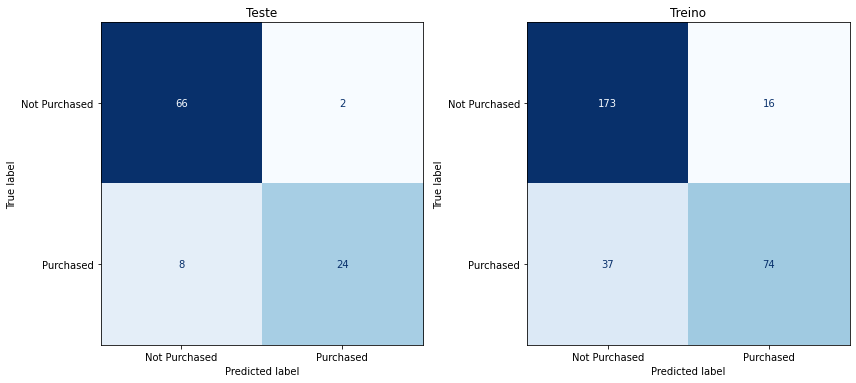

In [14]:
model_functions.plotta_cms(classifier, X_train, X_test, y_train, y_test, ['Not Purchased','Purchased'])

Treino


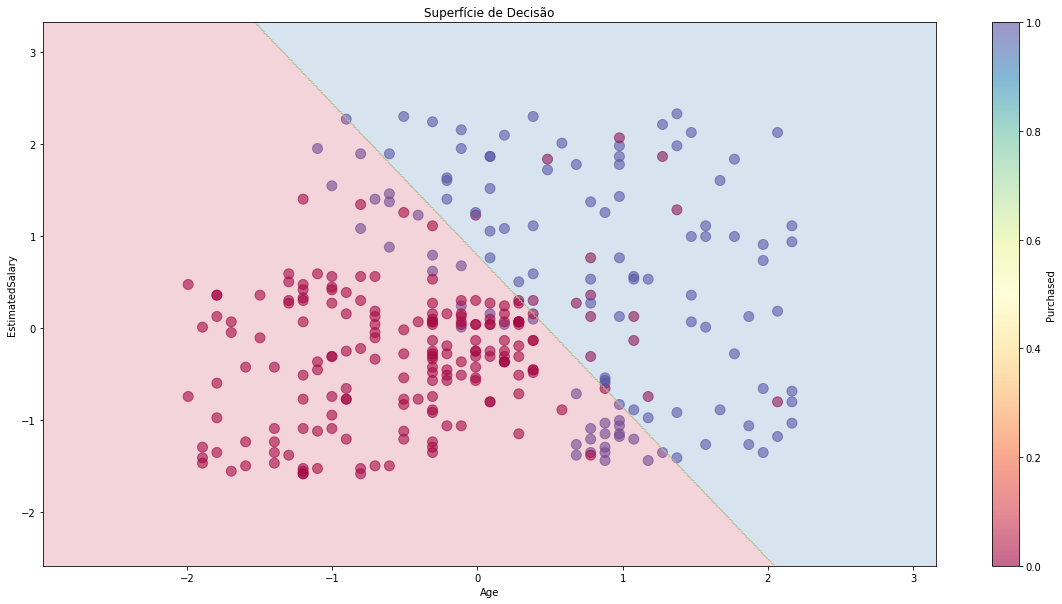

Teste


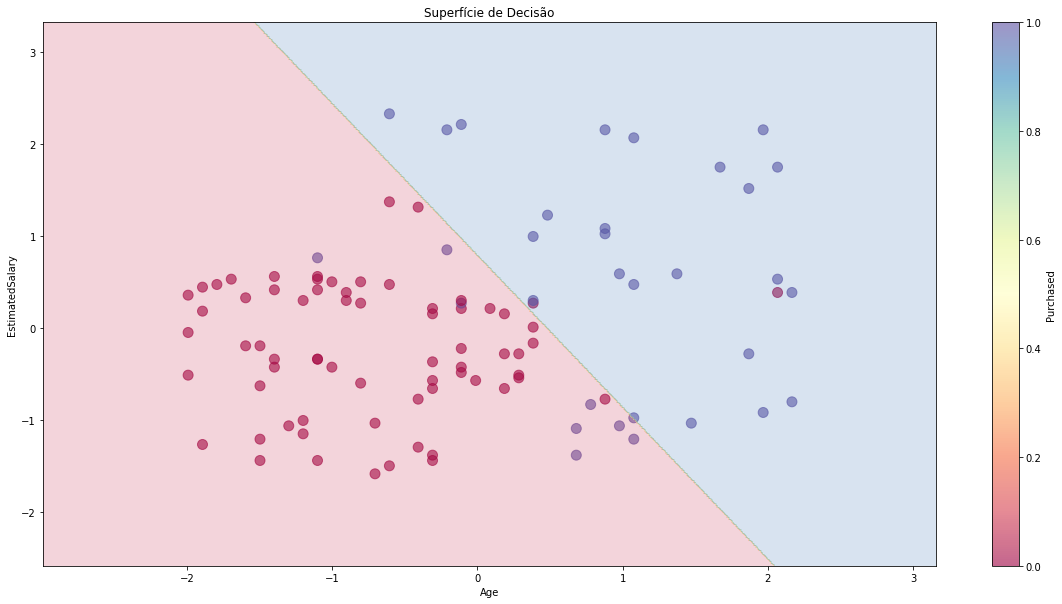

In [17]:
print('Treino')
model_functions.plot_decision_function(classifier,X_train,y_train, proba=False)

print('Teste')
model_functions.plot_decision_function(classifier,X_test,y_test, proba=False)

Text(0, 0.5, 'score')

<Figure size 576x360 with 0 Axes>

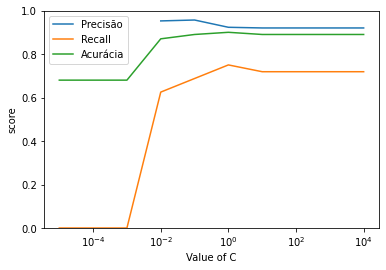

In [18]:
import warnings
warnings.filterwarnings("ignore")

figure=plt.figure(figsize=(8,5));

scores={}

for C_n in [0.00001*10**i for i in range(10)]:
    classifier= SVC(C=C_n, kernel='linear')
    classifier.fit(X_train, y_train)
    y_pred= y_pred = classifier.predict(X_test)
    cm_=confusion_matrix(y_test, y_pred)
    pr_= cm_[1,1]/(cm_[1,1]+cm_[0,1])
    rc_= cm_[1,1]/(cm_[1,1]+cm_[1,0])
    ac_= (cm_[0,0]+cm_[1,1])/cm_.sum()
    
    scores[C_n] =  (pr_,rc_,ac_)
    
scores_df = pd.DataFrame.from_dict(scores,orient='index', columns = ['Precisão', 'Recall', 'Acurácia'])
scores_df.plot()
plt.xscale('log')
plt.xlabel('Value of C')

plt.ylim(bottom=0, top=1)
plt.ylabel('score')
# plt.legend(['Precion','Recall','Accuracy'])

C:0.0001


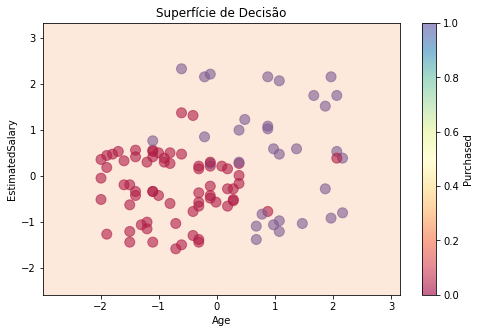

C:0.001


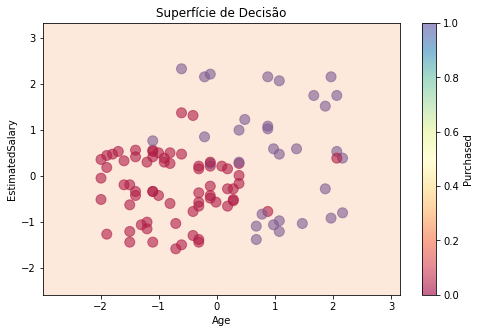

C:0.01


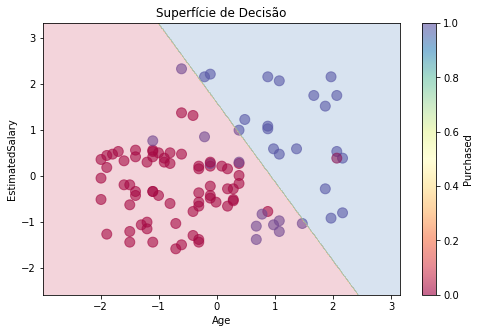

C:0.1


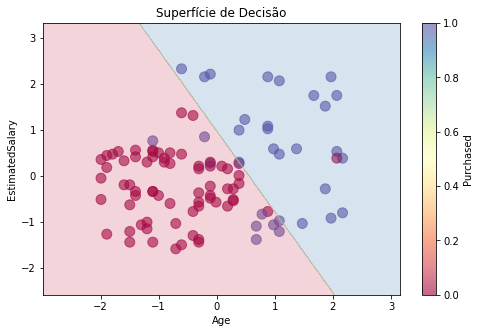

C:1.0


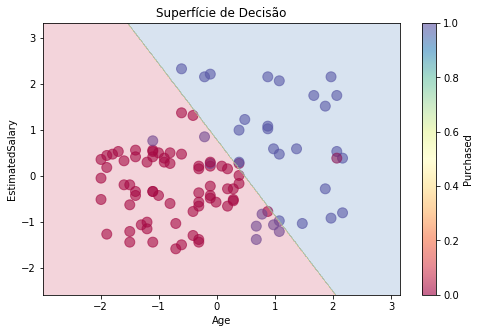

C:10.0


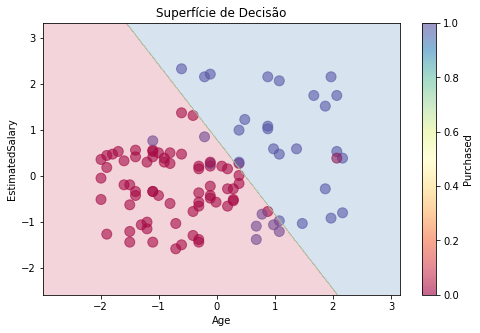

C:100.0


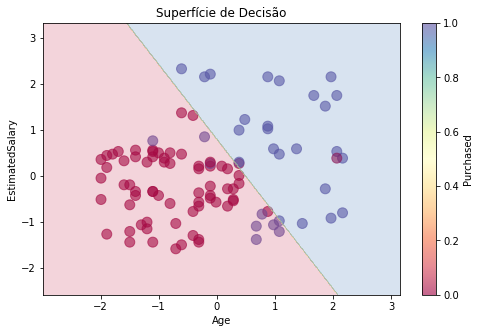

C:1000.0


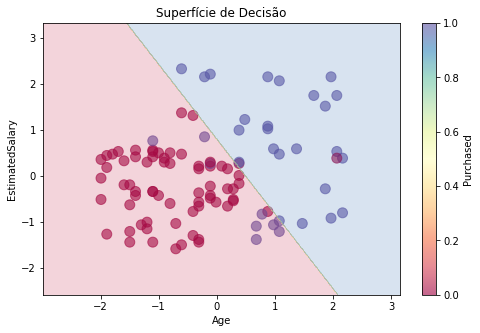

In [20]:
# import mglearn

# fig, axes= plt.subplots(2,4,figsize=(20,6))

for C_v in [0.0001*10**i for i in range(8)]:
    classifier= SVC(C=C_v, kernel='linear').fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('C:{}'.format(C_v))
    model_functions.plot_decision_function(classifier,X_test,y_test, proba=False, figsize=(8,5))


C:0.0001 | f1:0.7777777777777778


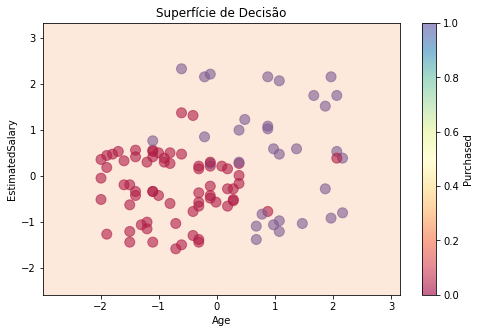

C:0.001 | f1:0.8421052631578947


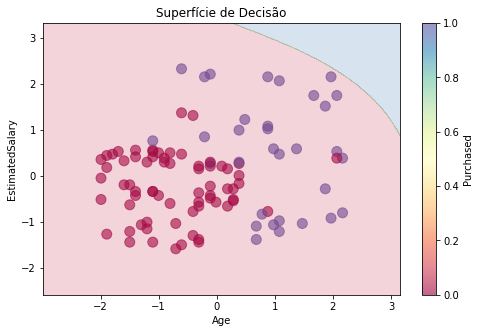

C:0.01 | f1:0.7547169811320755


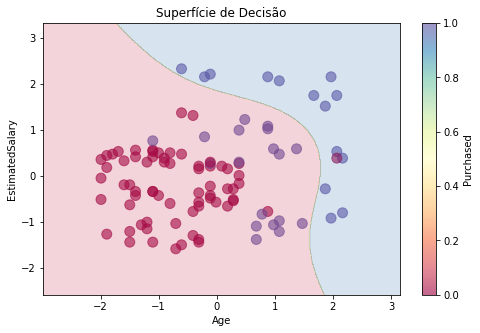

C:0.1 | f1:0.7547169811320755


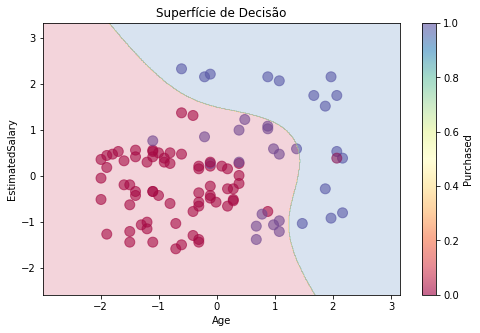

C:1.0 | f1:0.7307692307692308


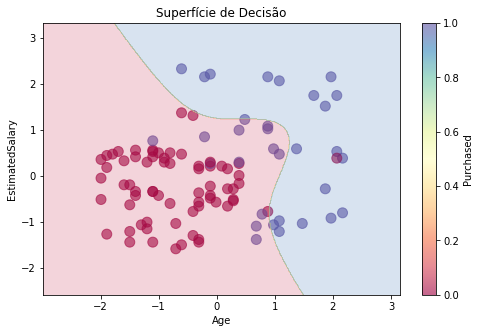

C:10.0 | f1:0.7307692307692308


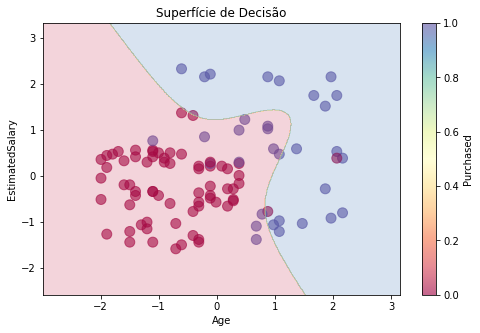

C:100.0 | f1:0.7058823529411765


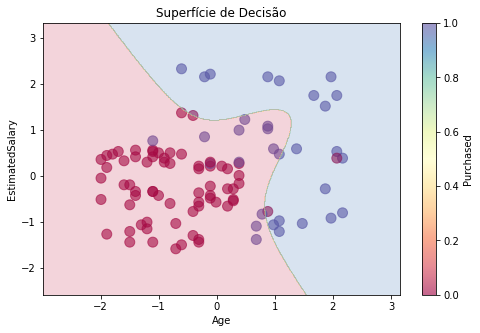

C:1000.0 | f1:0.7307692307692308


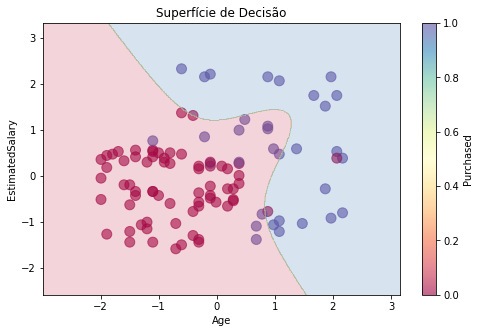

In [32]:
for C_v in [0.0001*10**i for i in range(8)]:
    classifier= SVC(C=C_v, kernel='poly', degree=3, probability=True).fit(X_train, y_train)
    results =model_functions.metrics(classifier, 'classification', X_train, X_test, y_train, y_test, verbose=False)
    y_pred = classifier.predict(X_test)
    print('C:{} | f1:{}'.format(C_v, results['test']['f1']))
    model_functions.plot_decision_function(classifier,X_test,y_test, proba=False, figsize=(8,5))

# Kernel Support Vector Machine (SVM)

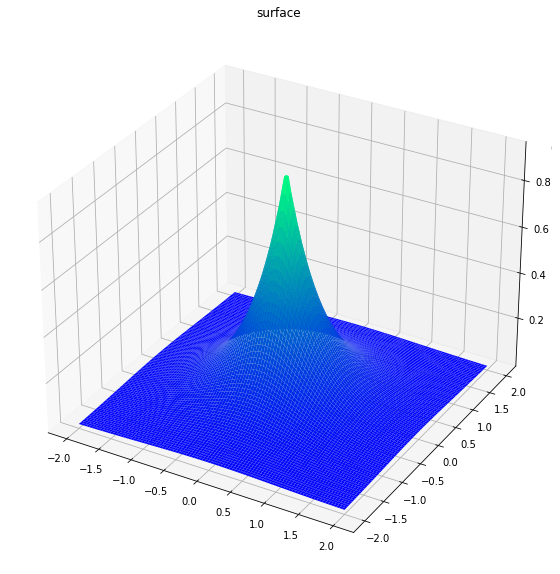

In [21]:
# RBF Kernel

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection="3d")
def z_function(x, y):
    sig=0.5
    px=0
    py=0
    return np.exp(-(np.sqrt((x-px)**2 + (y-py)**2)/(2*sig**2)))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('surface');

# Valor da Margem

In [35]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

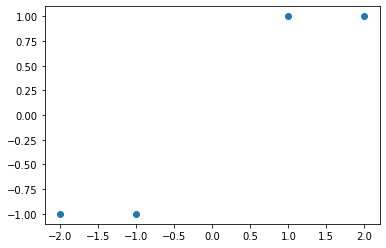

In [36]:
plt.scatter(X[:,0], X[:,1])

In [37]:
pd.DataFrame(clf.get_params(deep=True)).T[[0]]

,0
memory,None
steps,"(standardscaler, StandardScaler())"
verbose,False
standardscaler,StandardScaler()
svc,SVC(gamma='auto')
standardscaler__copy,True
standardscaler__with_mean,True
standardscaler__with_std,True
svc__C,1.0
svc__break_ties,False


In [38]:
# intercepto
clf[1].intercept_

array([-2.86604195e-05])

In [ ]:
#coeficientes
# clf[1].coef_
# não fuciona - apenas para linear

In [39]:
# suporte
clf[1].support_

array([0, 1, 2, 3])

In [40]:
## usando o classificador
clf.predict([[-0.8, -1]])

array([1])

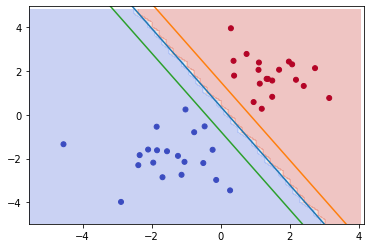

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fig, ax = plt.subplots()
clf = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1/(clf.coef_**2).sum()

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)
ax.plot(xx,yy + margin)
ax.plot(xx,yy - margin)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def generate_points():
    np.random.seed(24)
    X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
    Y = [0] * 20 + [1] * 20
    return X,Y

def SVM(X,Y,C):
    fig, ax = plt.subplots()
    clf = svm.LinearSVC(C=C).fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    margin = (2)/(clf.coef_**2).sum()
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

    Z = Z.reshape(xx2.shape)
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
    ax.plot(xx,yy)
    ax.plot(xx,yy + margin)
    ax.plot(xx,yy - margin)
    ax.set_title('C: {}'.format(C))

    ax.axis([x_min, x_max,y_min, y_max])
    plt.show()

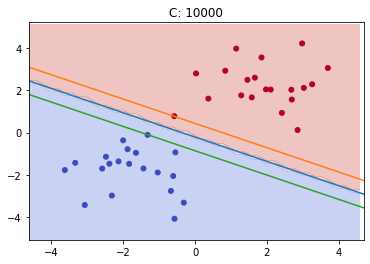

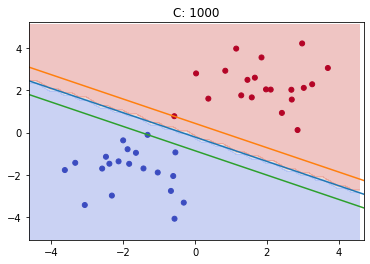

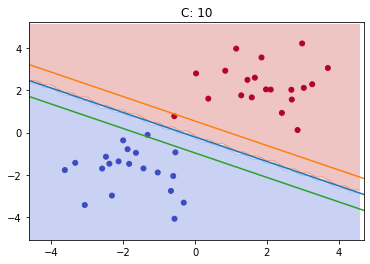

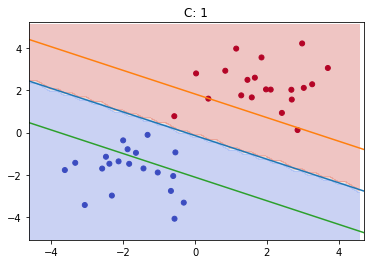

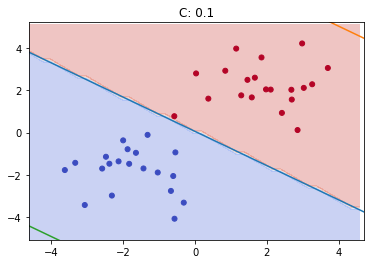

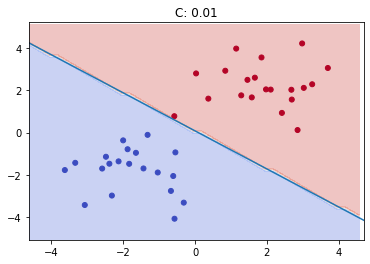

In [43]:
X,Y =generate_points()
SVM(X,Y,C= 10000)
SVM(X,Y,C= 1000)
SVM(X,Y,C= 10)
SVM(X,Y,C= 1)
SVM(X,Y,C= .1)
SVM(X,Y,C= .01)


In [ ]:
clf.get_params()